In [1]:
import os 
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\vyago\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir('C:/Users/vyago/Desktop/Maestría Ciencias de Datos/07-DMEYF/labo')

cluster = pd.read_csv('../exp/CLUST/exp_CLU1261_cluster_de_bajas.txt',sep='\t')
target_cluster = cluster['cluster2']


In [3]:
df_cluster = cluster[cluster.columns.drop(['clase_ternaria','cluster2'])]

In [76]:
standard_embedding = umap.UMAP(random_state=42,  n_components=2, n_neighbors=50
).fit_transform(df_cluster)


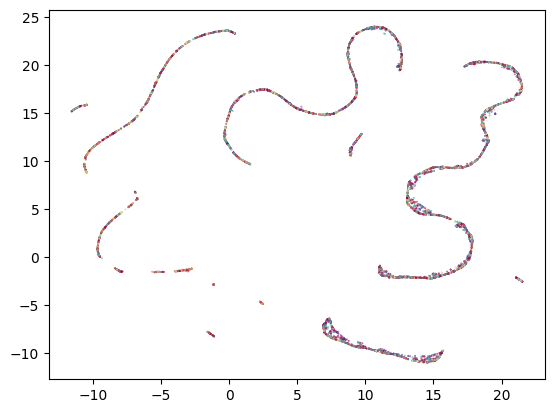

In [77]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=target_cluster,s=0.1, cmap='Spectral')


In [4]:
media_cluster = cluster.groupby(by='cluster2').mean()
median_cluster = cluster.groupby(by='cluster2').median()

In [6]:
cluster

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria,cluster2
0,31273443,202006,0,0,0,40,12,0.00,0.00,0.00,...,0.0,-6588.29,0.0,316,2187.49,2,0,0.00,BAJA+2,1
1,32613637,202006,0,0,0,53,166,0.00,0.00,0.00,...,0.0,-6588.29,0.0,1998,2187.49,2,0,35.19,BAJA+2,2
2,32782516,202006,0,0,0,81,313,0.00,0.00,0.00,...,0.0,-1166.46,0.0,5796,17284.21,10,0,0.00,BAJA+2,1
3,33050071,202006,0,0,0,53,252,0.00,0.00,0.00,...,0.0,-6588.29,0.0,1998,2187.49,2,0,35.19,BAJA+2,2
4,33289399,202006,0,0,0,68,83,0.00,0.00,0.00,...,0.0,-6588.29,0.0,1998,2187.49,2,0,35.19,BAJA+2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,206413989,202105,0,0,0,37,10,2351.40,4605.91,2249.08,...,0.0,-6588.29,0.0,1998,2187.49,2,0,35.19,BAJA+2,2
8804,207087353,202105,1,0,0,32,9,1488.99,315.45,1804.68,...,0.0,-7286.67,0.0,256,3489.02,2,0,668.61,BAJA+2,6
8805,207312577,202105,1,0,0,39,8,-40.53,-3811.76,224.92,...,0.0,-5226.51,0.0,238,22169.70,1,0,3542.46,BAJA+2,6
8806,212659672,202105,0,0,0,66,2,0.00,0.00,0.00,...,0.0,-6588.29,0.0,47,2187.49,2,0,0.00,BAJA+2,3


In [5]:
media_cluster.to_csv('media_cluster.csv')
median_cluster.to_csv('median_cluster.csv')

In [ ]:
variables = ["ctrx_quarter", "cpayroll_trx", "mcaja_ahorro", "mtarjeta_visa_consumo", "ctarjeta_visa_transacciones"]



In [7]:
cluster['cluster3'] = cluster['cluster2'].apply(lambda x: 1 if x in [1,5,6,7] else 0)

In [9]:
media_cluster3 = cluster.groupby(by='cluster3').mean()
media_cluster3.to_csv('cluster3.csv')

In [10]:
cluster['cluster3'].value_counts()

1    6465
0    2343
Name: cluster3, dtype: int64

In [11]:
6465/(6465+2343)

0.7339918256130791